In [1]:
import pandas as pd      #IMPORTANTE NO OLVIDAR ヽ(•‿ •)ノ
import numpy as np
pd.set_option("display.max_rows", 9) # Especificar el número de filas a mostrar
from scipy import stats # importando scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt # importando matplotlib
from matplotlib.ticker import NullFormatter
import seaborn as sns # importando seaborn
import calendar
plt.style.use('seaborn-whitegrid') # Se define el estilo, en este caso se elige la visualización clásica de Matlab

# PCA RECURSOS

1. Abrir el archivo
2. Separar las variables dependientes de las independientes (RECURSOS) y normalizarlas
3. Construcción de las matrices de varianza y covarianza
4. Cálculo de los valores propios
5. PCA

In [2]:
#Se importan las librerias necesarias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

1.Abrir el archivo

In [3]:
#Se cargan los archivos limpios sin variables respetidas, imputados los datos y sin atípicos

total=pd.read_excel("TOTALULIMPIO2.xlsx",index_col=0) #Recursos:amarillo #Capacidades:rojo #Resultados:azul
total

,ESTABLECIMIENTO,DPTO,CIIU,PERIODO,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,...,VALORACTIVOS,PROD_BRUTA,PROD_INDUST,INVERBRUTA,TEMPORALDIRECTO,VAL_AGREGADO,MPCOMPRADA,COMPRAS_MP_EXTERIOR,EXPORTACIONES,VENTAS
0,145898,11,1810,2008,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,...,641984.0,3525900,3525900,343423.189677,79.846659,912761,2602400.0,5.155038e+06,4.996960e+06,3460300.0
1,145904,11,1810,2008,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,...,201817.0,296411,296411,9406.000000,79.846659,122106,102941.0,5.155038e+06,4.996960e+06,296411.0
2,145912,11,1810,2008,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,...,143460.0,1594496,1594496,3200.000000,46.000000,366562,867491.0,5.155038e+06,1.946210e+05,1597520.0
3,145913,11,1741,2008,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,...,8704.0,166200,166200,-2000.000000,79.846659,92868,26720.0,5.155038e+06,4.996960e+06,231480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,987459,8,1410,2016,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,...,188741.0,1290356,1290356,11182.000000,54.000000,790408,618268.0,5.155038e+06,4.996960e+06,1100444.0
11636,987465,8,1410,2016,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,...,465071.0,3679414,3679414,343423.189677,8.000000,1476328,2164604.0,5.155038e+06,4.996960e+06,3300208.0
11637,987467,8,1410,2016,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,...,2874293.0,15549225,15550083,503083.000000,400.000000,7454626,6940062.0,5.155038e+06,1.608454e+06,15443532.0
11638,987483,8,1410,2016,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,...,300842.0,1284882,1284882,343423.189677,18.000000,835716,421689.0,5.155038e+06,1.717450e+05,1180126.0


2.Separar las variables dependientes de las independientes (RECURSOS) y normalizarlas

In [4]:
variables = ['SOCIOS','PERMANENTE','APRENDIZ','PROD_NAL','PROD_EXT','OBRERO','ADM','TOTPERSONAL','TEMPORALDIRECTO',
            'INV_MP','INV_PP','INV_PT','INV_PTNOFAB','TOTALINV','MPCOMPRADA','PROD_BRUTA','PROD_INDUST','INVER_TERRENO',
            'INVER_EDIF','INVER_MAQ','INVER_OFICINA','INVER_EQTRANSP','TOTALINVER','VAL_TERRENO','VAL_EDIF','VAL_MAQ',
            'VAL_OFICINA','VAL_EQTRANSP','VALORACTIVOS','INVERBRUTA','GASTOSCARTERA','SEGUROS','VENTAS']
# Separando los Recursos (Varibles independientes)
X=total.loc[:,variables].values 
# Separando el objetivo que es ventas (Variable dependiente)
y=total.loc [:, ['VENTAS']].values 
x_std= StandardScaler().fit_transform(X)

In [5]:
recursos = pd.DataFrame(data = X, columns = variables).head(10295)
recursos

,SOCIOS,PERMANENTE,APRENDIZ,PROD_NAL,PROD_EXT,OBRERO,ADM,TOTPERSONAL,TEMPORALDIRECTO,INV_MP,...,VAL_TERRENO,VAL_EDIF,VAL_MAQ,VAL_OFICINA,VAL_EQTRANSP,VALORACTIVOS,INVERBRUTA,GASTOSCARTERA,SEGUROS,VENTAS
0,1.665038,2.000000,5.370346,2.000000,2.2875,10.0,1.000000,13.0,79.846659,2.700570e+05,...,1.861905e+06,1.484530e+05,173535.0,86400.0,197796.000000,641984.0,343423.189677,8.969314e+06,43511.436095,3460300.0
1,2.000000,7.000000,5.370346,12.562613,2.2875,3.0,6.000000,9.0,79.846659,8.872281e+05,...,1.861905e+06,1.055540e+05,40547.0,10556.0,39638.000000,201817.0,9406.000000,8.969314e+06,4535.000000,296411.0
2,1.665038,46.562075,5.370346,1.000000,2.2875,30.0,5.000000,36.0,46.000000,8.872281e+05,...,1.861905e+06,2.269648e+06,134041.0,3200.0,132514.502622,143460.0,3200.000000,8.969314e+06,993.000000,1597520.0
3,1.000000,46.562075,5.370346,2.000000,2.2875,3.0,19.714668,5.0,79.846659,4.000200e+04,...,1.861905e+06,2.269648e+06,7700.0,500.0,132514.502622,8704.0,-2000.000000,8.969314e+06,43511.436095,231480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,2.000000,46.562075,3.000000,12.562613,2.2875,27.0,19.000000,46.0,54.000000,1.477983e+06,...,1.861905e+06,2.269648e+06,163917.0,6425.0,132514.502622,188741.0,11182.000000,8.969314e+06,10847.000000,1100444.0
10292,1.665038,40.000000,2.000000,12.562613,2.2875,29.0,17.000000,46.0,8.000000,8.872281e+05,...,1.861905e+06,2.000000e+05,93843.0,14789.0,151500.000000,465071.0,343423.189677,8.969314e+06,4900.000000,3300208.0
10293,1.665038,36.000000,12.000000,9.000000,2.2875,260.0,34.000000,303.0,400.000000,7.329380e+05,...,1.861905e+06,2.460000e+05,2049837.0,207837.0,159674.000000,2874293.0,503083.000000,2.444700e+04,34127.000000,15443532.0
10294,1.000000,3.000000,2.000000,12.562613,2.2875,11.0,10.000000,21.0,18.000000,8.911900e+04,...,1.861905e+06,3.052600e+04,61378.0,80619.0,84752.000000,300842.0,343423.189677,8.969314e+06,3149.000000,1180126.0


In [6]:
#No hay datos perdidos pues se esta utilizando el archivo de los datos limpios

recursos.isnull().sum() # Saber si hay casos con NA
recursos.dropna(how="all", inplace=True) # Eliminar las observaciones con NA
recursos.columns

Index(['SOCIOS', 'PERMANENTE', 'APRENDIZ', 'PROD_NAL', 'PROD_EXT', 'OBRERO',
       'ADM', 'TOTPERSONAL', 'TEMPORALDIRECTO', 'INV_MP', 'INV_PP', 'INV_PT',
       'INV_PTNOFAB', 'TOTALINV', 'MPCOMPRADA', 'PROD_BRUTA', 'PROD_INDUST',
       'INVER_TERRENO', 'INVER_EDIF', 'INVER_MAQ', 'INVER_OFICINA',
       'INVER_EQTRANSP', 'TOTALINVER', 'VAL_TERRENO', 'VAL_EDIF', 'VAL_MAQ',
       'VAL_OFICINA', 'VAL_EQTRANSP', 'VALORACTIVOS', 'INVERBRUTA',
       'GASTOSCARTERA', 'SEGUROS', 'VENTAS'],
      dtype='object')

In [7]:
#Se elimina la variable ventas pues X=VARIABLES INDEPENDIENTES=Recursos
x=recursos.drop("VENTAS",axis = 1)

y=recursos["VENTAS"]  #Y=VARIABLE DEPENDIENTE= Ventas
names=recursos.columns
X_std= StandardScaler().fit_transform(x) #Normalizando

<Figure size 432x288 with 0 Axes>

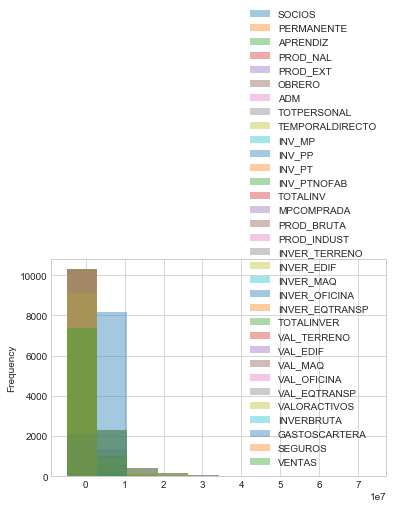

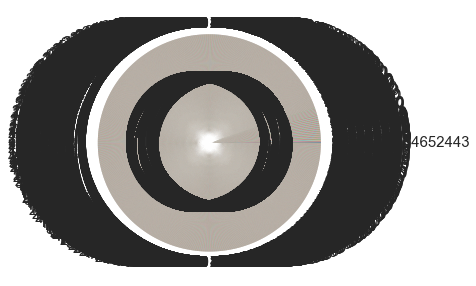

In [8]:
plt.figure("Histograma")
recursos.plot.hist(alpha=0.4)
plt.figure("Gráfico de pie",figsize=(5,5))
recursos.VENTAS.value_counts().plot(kind="pie",autopct='%1.1f%%', fontsize=15)
plt.show()

3.Construcción de las matrices de varianza y covarianza

Para que se pueda realizar el PCA, es necesario que las variables presenten factores comunes. Es decir, que estén muy correlacionadas entre sí. Los coeficientes de la matriz de correlaciones deben ser grandes en valor absoluto.

In [9]:
# Matriz de covarianza

mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)

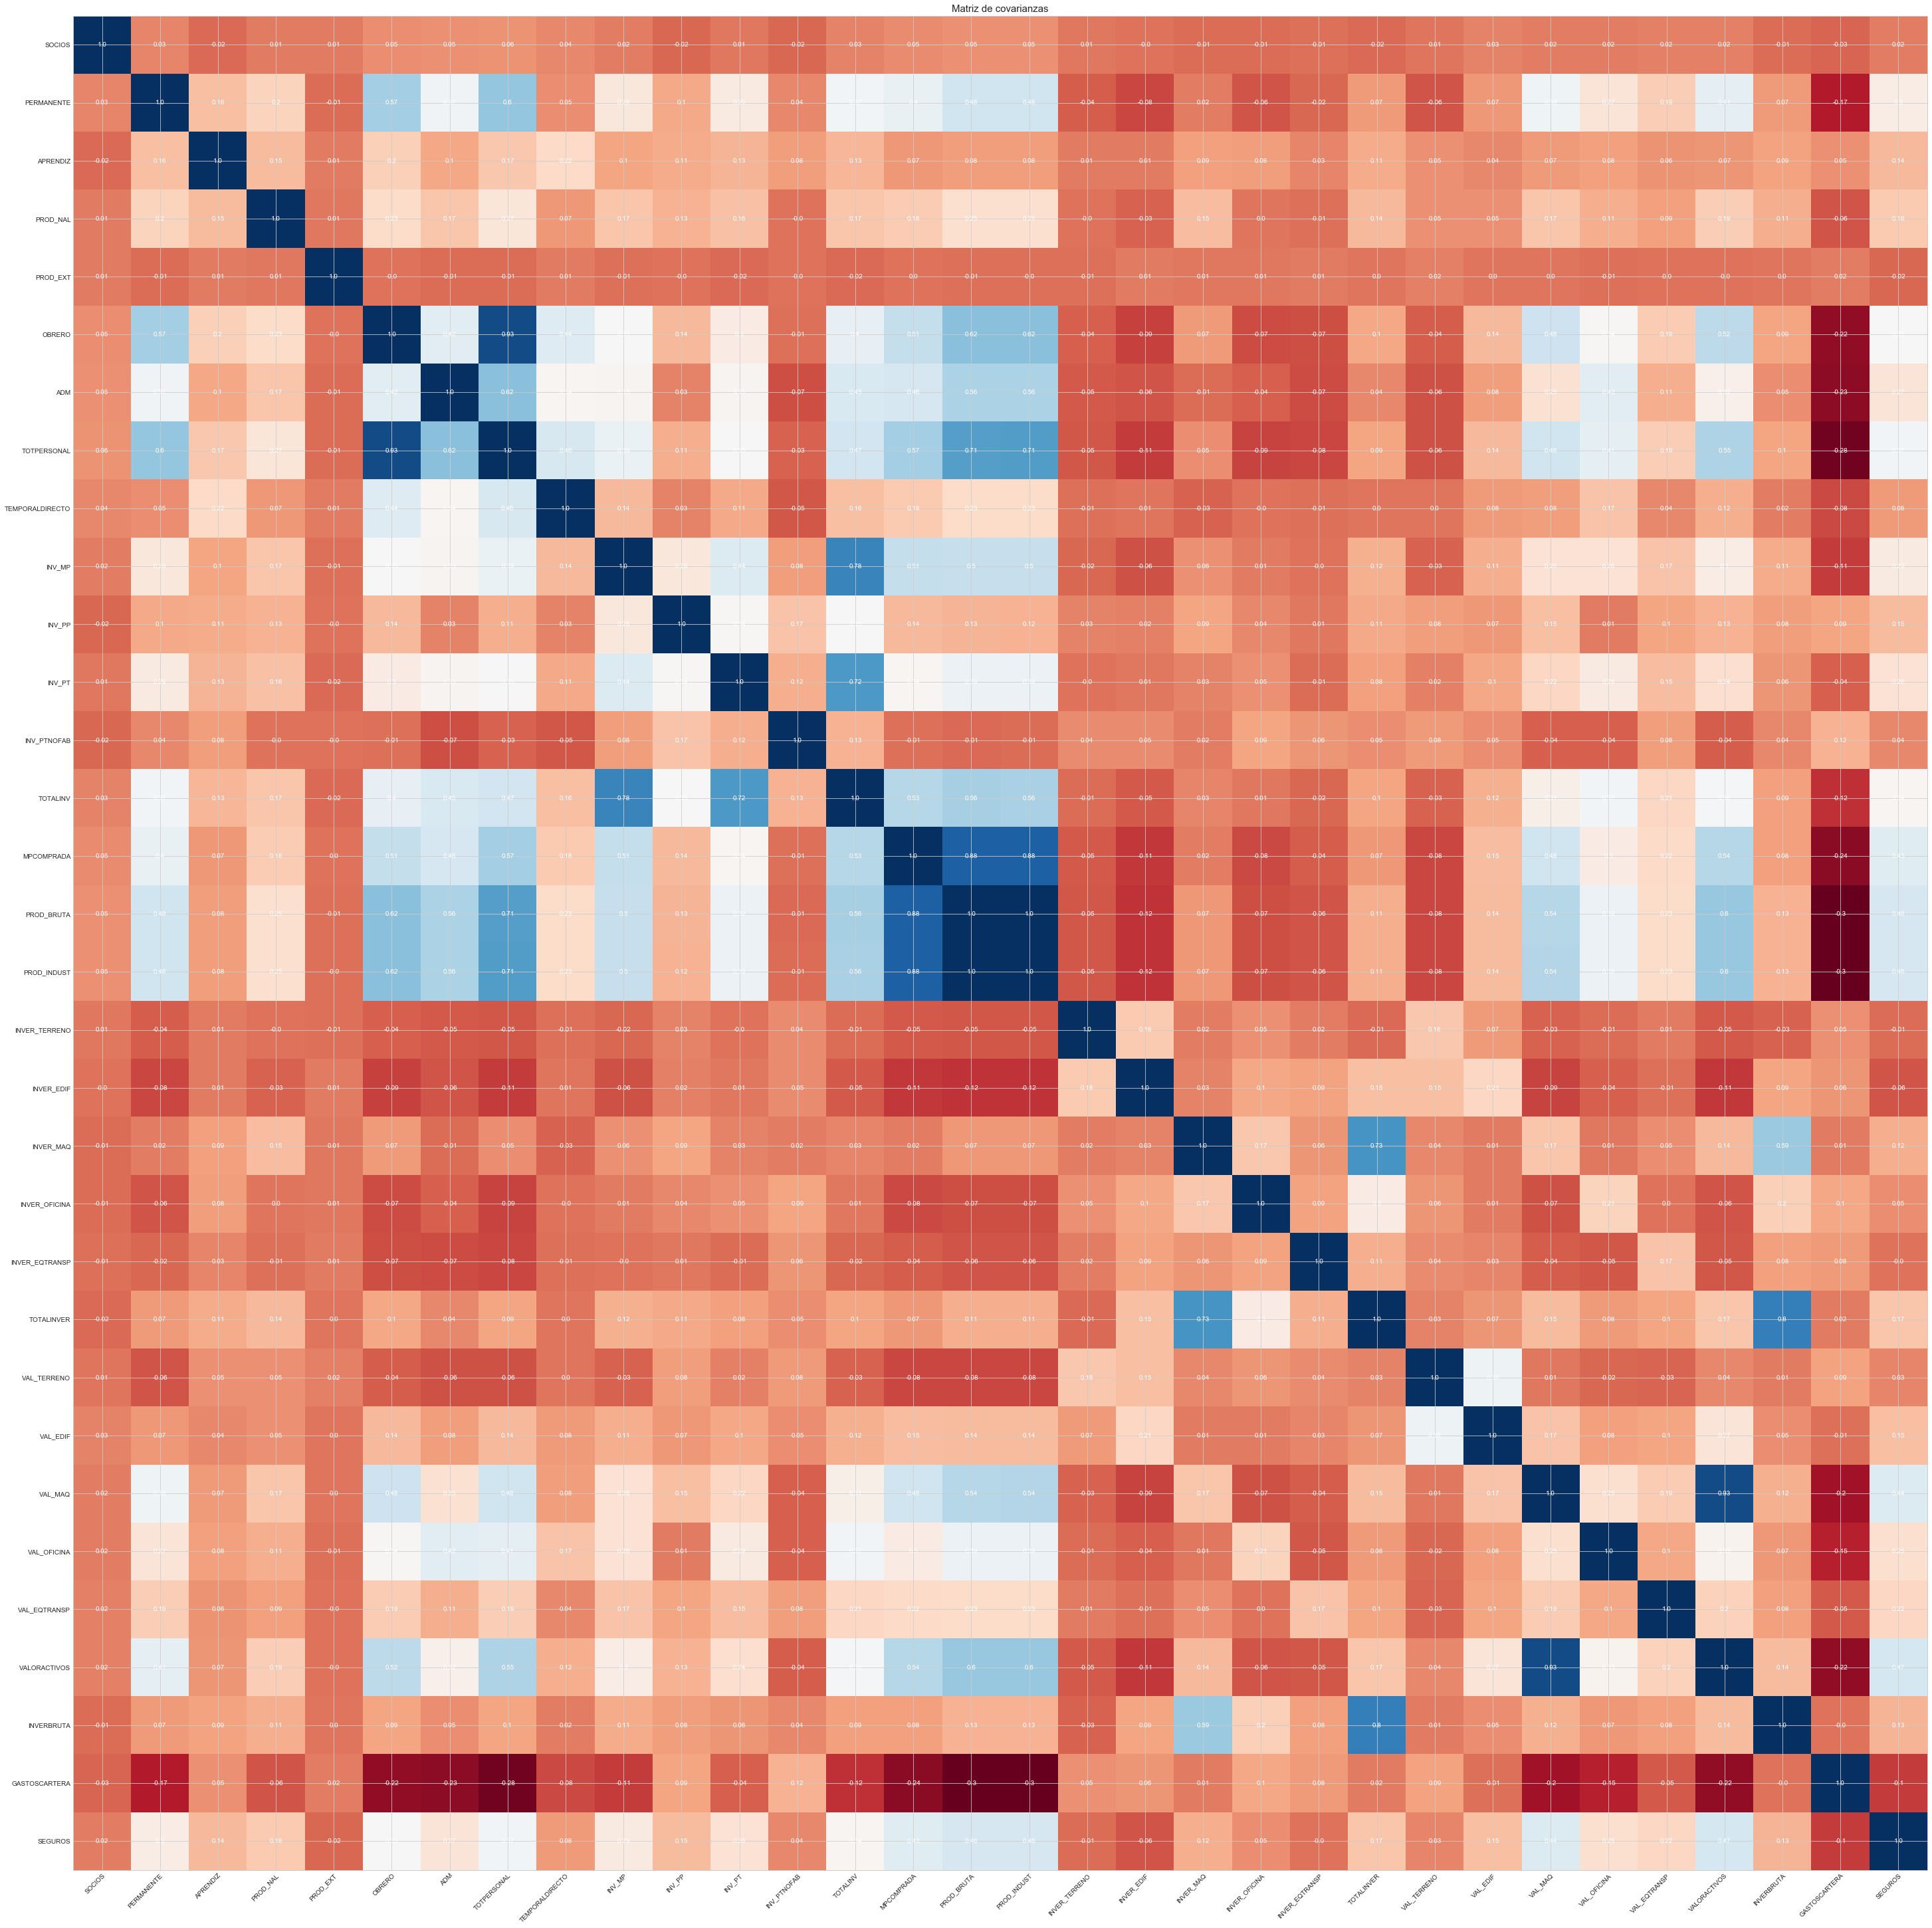

In [10]:
#Gráficar en un mapa de calor las covarianzas

corMat=np.asarray(cov_mat)

fig, ax = plt.subplots(figsize=(50,100))#Figsize para aumentar el tamaño
im = ax.imshow(corMat,cmap="RdBu")

# Mostrar las etiquetas de las variables
ax.set_xticks(np.arange(len(names)-1))
ax.set_yticks(np.arange(len(names)-1))
# Asignar los nombres a las etiquetas
ax.set_xticklabels(names[:33])
ax.set_yticklabels(names[:33])

# Rotar los nombres
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop para asignar los valores de las correlaciones en el mapa de calor
for i in range(len(names)-1):
    for j in range(len(names)-1):
        text = ax.text(j, i, round(corMat[i, j],2),
                       ha="center", va="center", color="w")

plt.title("Matriz de covarianzas", fontdict={"fontsize":15}) 
# o de correlación si los datos están normalizados
plt.show()

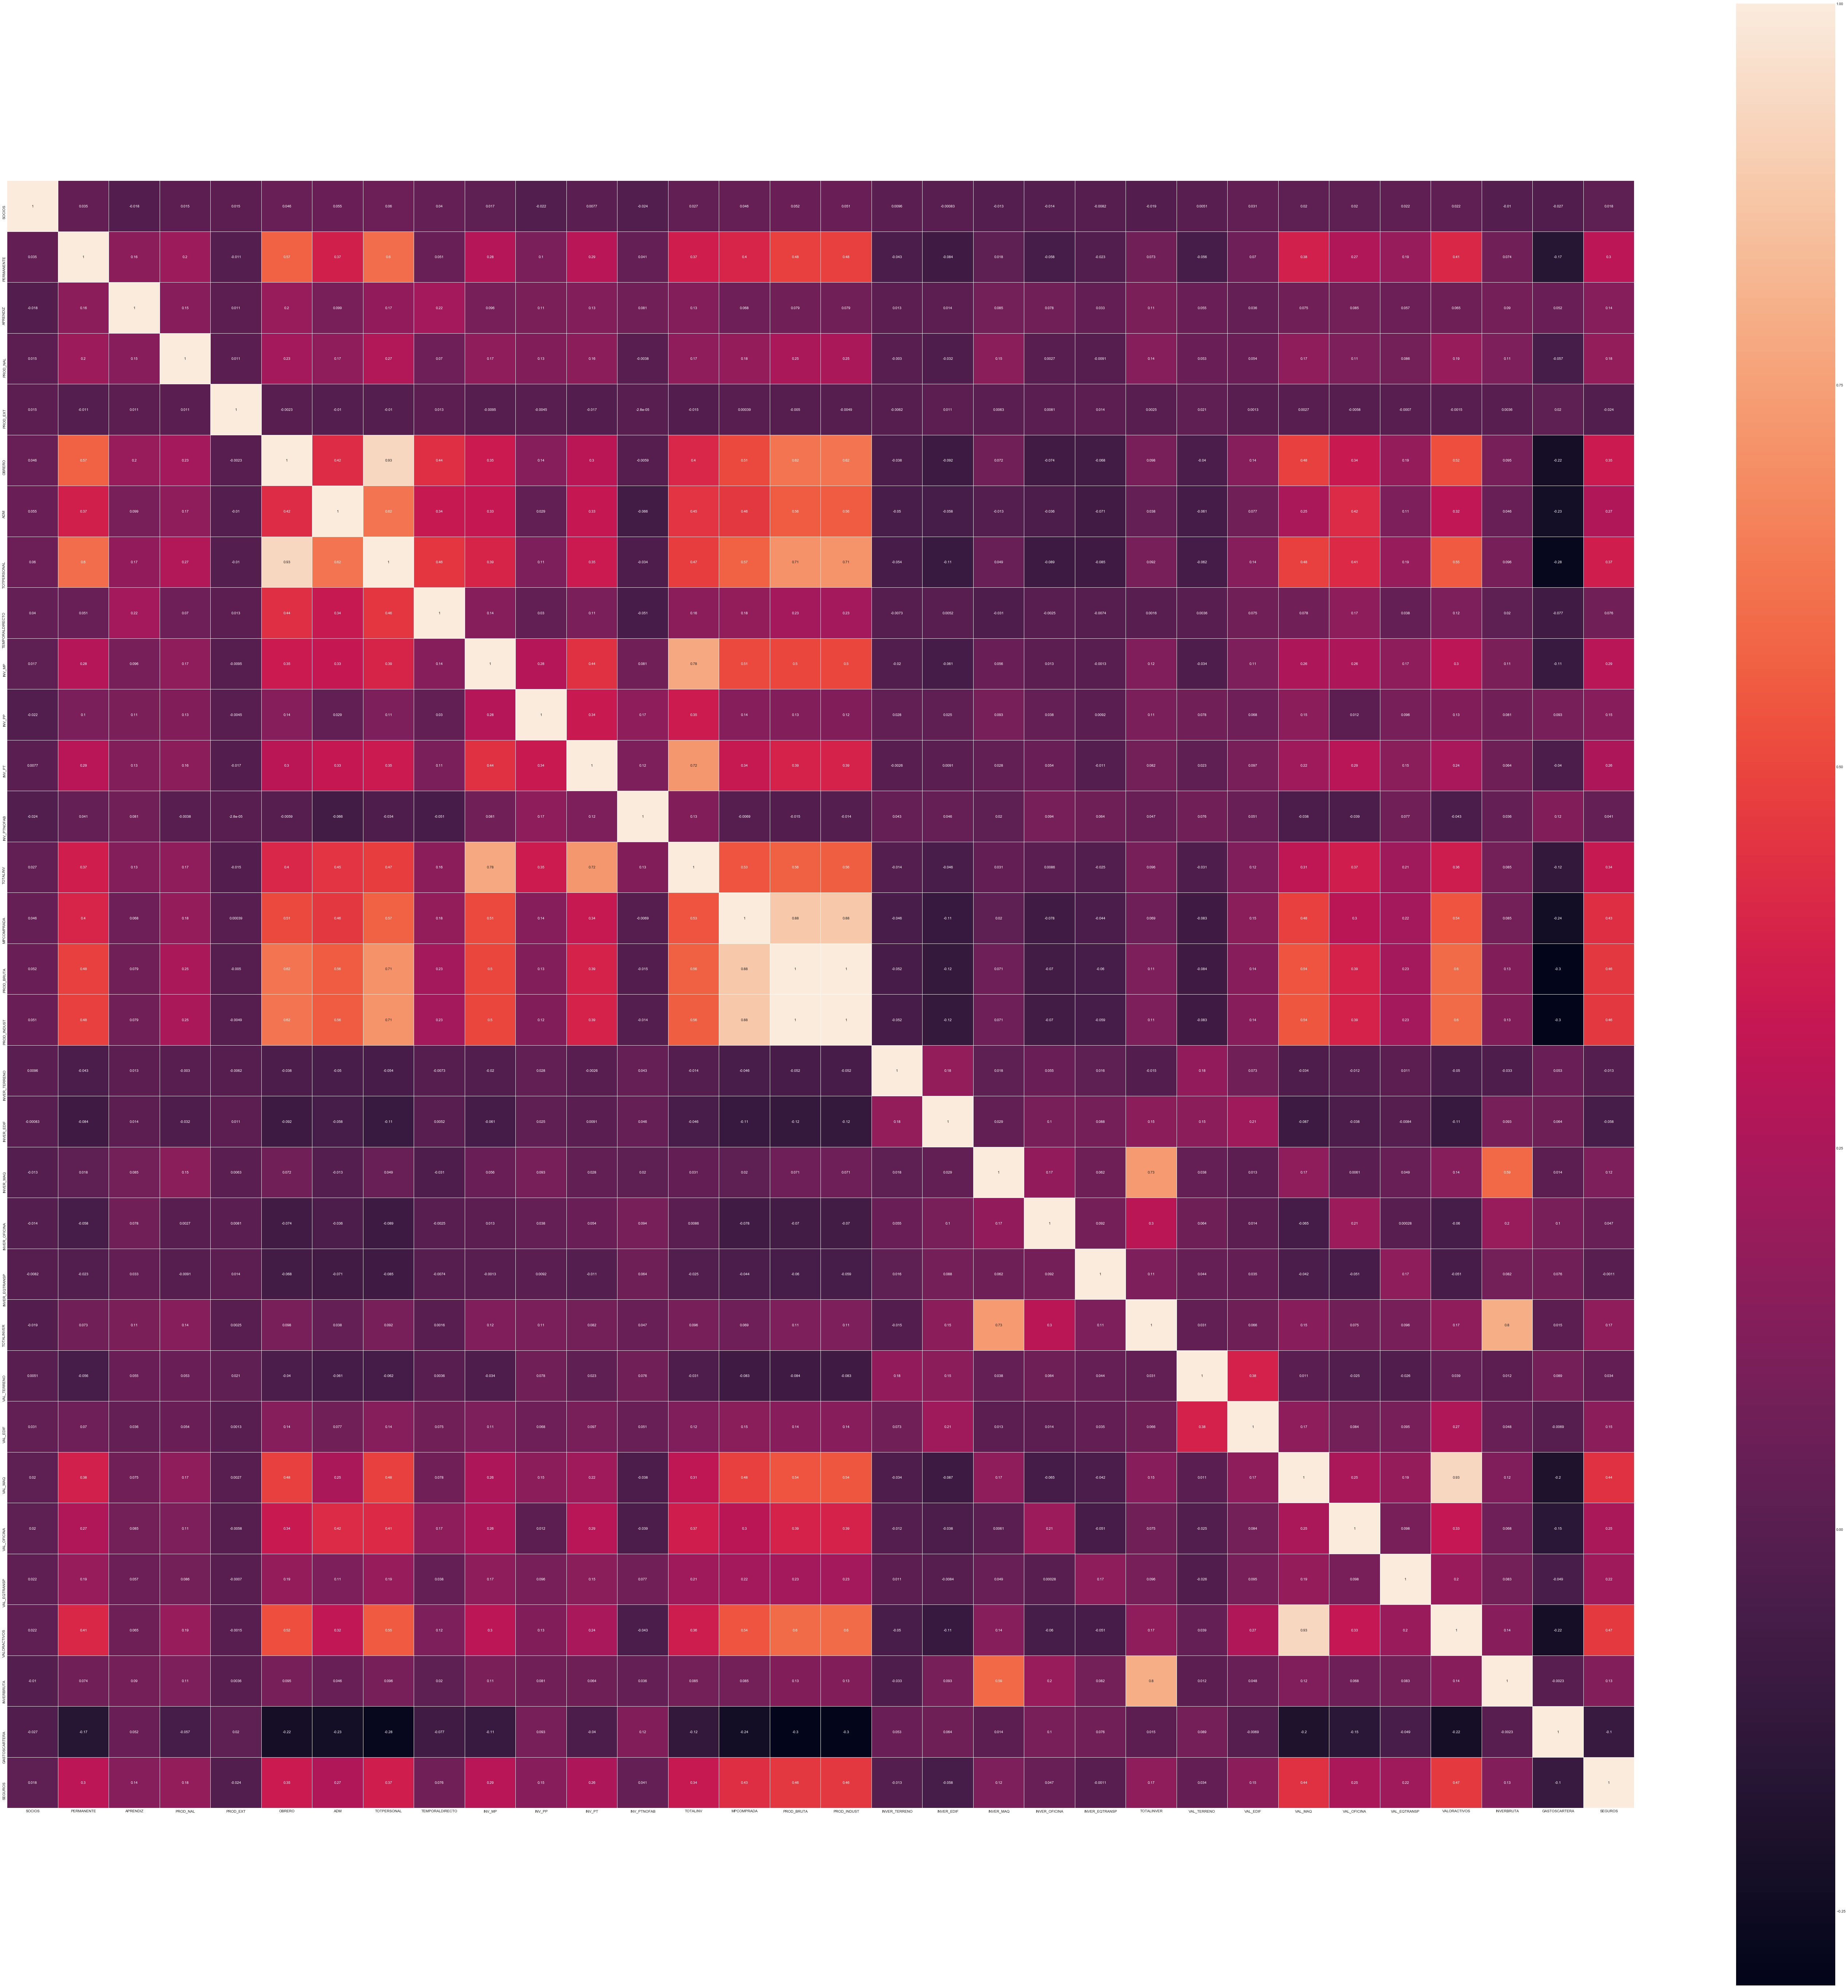

In [11]:
#Matriz de covarianzas
plt.subplots(figsize=(100,100))
sns.heatmap(x.corr(), square=True, annot=True, linewidths =0.4)

4.Cálculo de los valores propios

In [12]:
eigen_value, eigen_vector =np.linalg.eig(corMat) 
print("Valores propios \n  %s \n" %eigen_value)
print("Vectores propios \n %s" %eigen_vector)

Valores propios 
  [7.68735746e+00 2.67295079e+00 1.87439485e+00 1.60260371e+00
 1.48012721e+00 4.38456638e-04 3.21039324e-02 5.72817179e-02
 1.57762575e-01 1.22718123e-01 1.31949272e-01 1.22725154e+00
 3.16042978e-01 3.95655962e-01 1.13553499e+00 4.73043029e-01
 5.01689914e-01 1.06468146e+00 5.34533702e-01 5.80387966e-01
 6.19451792e-01 6.50576642e-01 1.01034373e+00 9.79277816e-01
 9.51409086e-01 9.18035929e-01 8.80626005e-01 8.53583156e-01
 7.47534492e-01 7.64161369e-01 7.93067115e-01 7.86531856e-01] 

Vectores propios 
 [[-2.02967011e-02  3.35192632e-02 -2.14794108e-02 ... -7.79946103e-02
  -6.92048074e-02 -5.64525777e-02]
 [-2.22023840e-01  4.55425225e-02 -3.78046621e-02 ... -6.13927073e-04
  -4.21897045e-03  1.75993270e-01]
 [-6.98871693e-02 -1.03397890e-01  1.13537220e-01 ... -4.34416787e-02
  -4.93656944e-01 -3.99350677e-01]
 ...
 [-7.10978664e-02 -4.76937645e-01 -1.94400506e-01 ...  8.25420378e-02
   2.16432142e-02  3.16398122e-03]
 [ 1.08937726e-01 -1.26035845e-01  2.41430254e

In [13]:
var=[(eigen_value[i]/10)*100 for i in range(len(eigen_value))]
var_cum=[]
for i in range(len(var)):
    var_cum.append(sum(var[:i+1]))
var_cum

#Estan dando valores muy extraños REVISAR ¿Por qué varianza explicada da mas de 100% (Hasta 300%)????

[76.87357459147647,
 103.60308249273722,
 122.34703095881154,
 138.3730680239114,
 153.1743401140083,
 153.17872468038908,
 153.49976400466207,
 154.0725811838469,
 155.6502069386229,
 156.87738816784955,
 158.19688088868077,
 170.46939626462742,
 173.6298260457999,
 177.58638566745086,
 188.94173554943254,
 193.67216583618767,
 198.6890649723216,
 209.3358795393868,
 214.681216557952,
 220.48509621873447,
 226.67961413928663,
 233.1853805607794,
 243.28881784386175,
 253.08159600188117,
 262.595686863607,
 271.77604615026576,
 280.5823061980632,
 289.1181377617728,
 296.5934826768997,
 304.235096363566,
 312.16576751191536,
 320.03108606955504]

Gráfico de la varianza asociada a cada factor. Se utiliza para determinar cuántos factores deben retenerse. Típicamente el gráfico muestra la clara ruptura entre la pronunciada pendiente de los factores más importantes. 

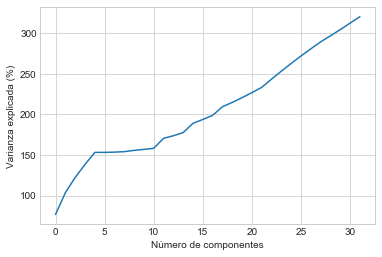

In [14]:
#El nuúmero de componentes esta determinado por el punto donde se encuentra una clara ruptura o punto de inflexión

plt.plot(var_cum,linestyle="-")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada (%)")
plt.show()

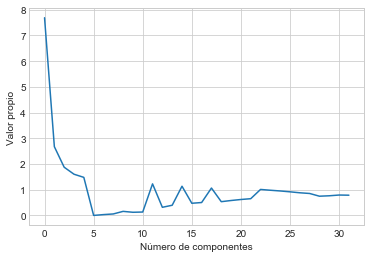

In [15]:
plt.plot(eigen_value,linestyle="-")
plt.xlabel("Número de componentes")
plt.ylabel("Valor propio")
plt.show()

Tomando sólo la primer componente tenemos el 76,87% de la varianza explicada. Por lo tanto tomamos el primer componente

In [16]:
M_w=eigen_vector[:,0:1]
Y=X_std.dot(M_w) # Nuevos Y

5.PCA

In [17]:
from sklearn.decomposition import PCA

sklearn_PCA= PCA(n_components=1)
Y_1=sklearn_PCA.fit_transform(X_std)

In [18]:
PCArecursos = pd.DataFrame(data = Y_1, columns = ['Componenteprincipal1'])
PCArecursos.head(10295)

,Componenteprincipal1
0,-0.693749
1,-1.411383
2,-1.096467
3,-1.293772
...,...
10291,-0.254945
10292,-0.200592
10293,6.776613
10294,-1.477882


In [19]:
ventas=total[['VENTAS']].head(10295)
ventas

,VENTAS
0,3460300.0
1,296411.0
2,1597520.0
3,231480.0
...,...
11635,1100444.0
11636,3300208.0
11637,15443532.0
11638,1180126.0


In [20]:
PCArecursos.reset_index(drop=True, inplace=True) 
ventas.reset_index(drop=True, inplace=True) 
PCA_R = pd.concat([ventas,PCArecursos], axis=1)
PCA_R

,VENTAS,Componenteprincipal1
0,3460300.0,-0.693749
1,296411.0,-1.411383
2,1597520.0,-1.096467
3,231480.0,-1.293772
...,...,...
10291,1100444.0,-0.254945
10292,3300208.0,-0.200592
10293,15443532.0,6.776613
10294,1180126.0,-1.477882


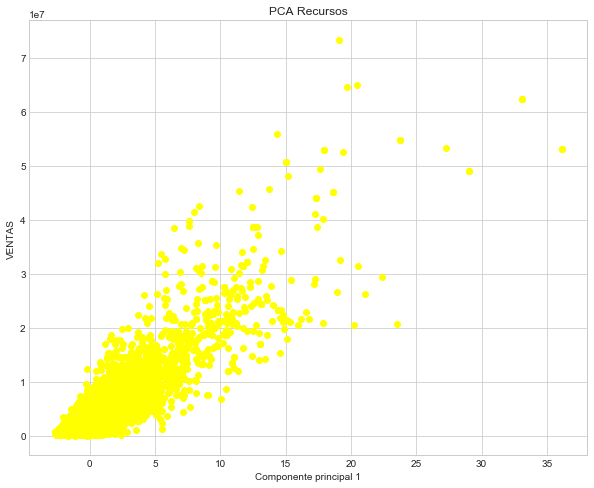

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(PCA_R['Componenteprincipal1'], PCA_R['VENTAS'],c='yellow')

plt.title('PCA Recursos')
plt.xlabel('Componente principal 1')
plt.ylabel('VENTAS')
plt.show()

Text(0.5,1,'Histograma Componente principal Recursos')

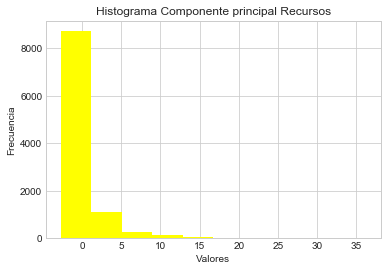

In [22]:
#Histograma Componente Principal Recursos

b=plt.hist(PCA_R.Componenteprincipal1,color="yellow") #Histograma de una variable utilizando la función hist()
b=plt.xlabel("Valores")
b=plt.ylabel("Frecuencia");
b=plt.title("Histograma Componente principal Recursos")
b